In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icpc-world-finals-ranking-since-1999/icpc-full.csv
/kaggle/input/icpc-world-finals-ranking-since-1999/years/icpc-2022.csv
/kaggle/input/icpc-world-finals-ranking-since-1999/years/icpc-2000.csv
/kaggle/input/icpc-world-finals-ranking-since-1999/years/icpc-2009.csv
/kaggle/input/icpc-world-finals-ranking-since-1999/years/icpc-2017.csv
/kaggle/input/icpc-world-finals-ranking-since-1999/years/icpc-2015.csv
/kaggle/input/icpc-world-finals-ranking-since-1999/years/icpc-2005.csv
/kaggle/input/icpc-world-finals-ranking-since-1999/years/icpc-1999.csv
/kaggle/input/icpc-world-finals-ranking-since-1999/years/icpc-2010.csv
/kaggle/input/icpc-world-finals-ranking-since-1999/years/icpc-2008.csv
/kaggle/input/icpc-world-finals-ranking-since-1999/years/icpc-2023.csv
/kaggle/input/icpc-world-finals-ranking-since-1999/years/icpc-2021.csv
/kaggle/input/icpc-world-finals-ranking-since-1999/years/icpc-2013.csv
/kaggle/input/icpc-world-finals-ranking-since-1999/years/icpc-2002.csv
/kaggle/inpu

In [22]:
# Step 1
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [23]:
# Step 2
# Loadind Data into DataFrame
path = "/kaggle/input/icpc-world-finals-ranking-since-1999/icpc-full.csv"
df= pd.read_csv(path)

In [24]:
df.head()

,Year,Date,Host,City,Venue,Rank,University,Country,Team,Contestant 1,...,Contestant 3,Gold,Silver,Bronze,Honorable,Score,Total,Score Percentage,Penalty,Prize
0,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,1.0,University of Waterloo,Canada,U Waterloo,David Kennedy,...,Viet-Trung Luu,True,False,False,False,6.0,8,0.75,948.0,World Champion
1,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,2.0,Albert-Ludwigs-Universität Freiburg,Germany,Freiburg B Team,NaN,...,NaN,False,True,False,False,6.0,8,0.75,992.0,NaN
2,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,3.0,St. Petersburg Institute of Fine Mechanics & O...,Russia,St. Petersburg IFMO,Alexander Volkov,...,Vladimir Lyovkin,False,False,True,False,6.0,8,0.75,1046.0,NaN
3,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,4.0,University of Bucharest,Romania,UNIBUC Bucharest,NaN,...,NaN,False,False,True,False,6.0,8,0.75,1048.0,NaN
4,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,5.0,Duke University,United States,Duke Blue Devils,NaN,...,NaN,False,False,True,False,6.0,8,0.75,1337.0,NaN


In [25]:
df.tail()

,Year,Date,Host,City,Venue,Rank,University,Country,Team,Contestant 1,...,Contestant 3,Gold,Silver,Bronze,Honorable,Score,Total,Score Percentage,Penalty,Prize
2703,2024,2024-09-19,Kazakhstan,Astana,Astana EXPO,137.0,Tishreen University,Syria,Underagat,Elias Obeid,...,Osama Saleh,False,False,False,True,2.0,12,0.17,605.0,NaN
2704,2024,2024-09-19,Kazakhstan,Astana,Astana EXPO,138.0,Universidade de São Paulo - Campus de São Carlos,Brazil,que time é teu?,Dikson Santos,...,Thiago Queiroz,False,False,False,True,2.0,12,0.17,652.0,NaN
2705,2024,2024-09-19,Kazakhstan,Astana,Astana EXPO,139.0,Damascus University,Syria,vector.pop_corn,Ahmad Hamoudeh,...,Mhd Yaser Harba,False,False,False,True,2.0,12,0.17,745.0,NaN
2706,2024,2024-09-19,Kazakhstan,Astana,Astana EXPO,140.0,ITESM Campus Guadalajara,Mexico,Borregos Salvajes,Carlos David Amezcua Canales,...,Karla Rebeca Munguía Romero,False,False,False,True,1.0,12,0.08,85.0,NaN
2707,2024,2024-09-19,Kazakhstan,Astana,Astana EXPO,141.0,Kabul University,Afghanistan,Constructor,Ali Baba Hussaini,...,Mohammad Anwar Hussaini,False,False,False,True,0.0,12,0.00,0.0,NaN


In [26]:
# Step 3
# Data Preprocessing

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708 entries, 0 to 2707
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              2708 non-null   int64  
 1   Date              2708 non-null   object 
 2   Host              2708 non-null   object 
 3   City              2708 non-null   object 
 4   Venue             2708 non-null   object 
 5   Rank              2665 non-null   float64
 6   University        2708 non-null   object 
 7   Country           2708 non-null   object 
 8   Team              2706 non-null   object 
 9   Contestant 1      2320 non-null   object 
 10  Contestant 2      2319 non-null   object 
 11  Contestant 3      2310 non-null   object 
 12  Gold              2708 non-null   bool   
 13  Silver            2708 non-null   bool   
 14  Bronze            2708 non-null   bool   
 15  Honorable         2708 non-null   bool   
 16  Score             2675 non-null   float64


In [27]:
# statistical analysis
df.describe()

,Year,Rank,Score,Total,Score Percentage,Penalty
count,2708.000000,2665.000000,2675.000000,2708.000000,2675.000000,2590.000000
mean,2013.341211,55.226266,4.024673,11.166544,0.360617,665.842085
std,7.087889,34.900656,2.208162,1.499155,0.193396,380.240061
min,1999.000000,1.000000,0.000000,8.000000,0.000000,0.000000
25%,2008.000000,26.000000,2.000000,11.000000,0.230000,386.250000
50%,2014.000000,51.000000,4.000000,11.000000,0.360000,656.000000
75%,2019.000000,82.000000,5.000000,12.000000,0.500000,933.000000
max,2024.000000,141.000000,13.000000,15.000000,1.000000,1912.000000


In [28]:
# Step 4
# Data CLeaning

df.isnull().sum()

Year                   0
Date                   0
Host                   0
City                   0
Venue                  0
Rank                  43
University             0
Country                0
Team                   2
Contestant 1         388
Contestant 2         389
Contestant 3         398
Gold                   0
Silver                 0
Bronze                 0
Honorable              0
Score                 33
Total                  0
Score Percentage      33
Penalty              118
Prize               2544
dtype: int64

In [29]:
# Drop prize col
df = df.drop('Prize', axis=1)

In [30]:
# Fill null values by the avrage of the Score Percentage
df["Score Percentage"] = df["Score Percentage"].fillna(df["Score Percentage"].mean())

In [31]:
# Fill null values in the "Penalty" column with the median value
df["Penalty"] = df["Penalty"].fillna(df["Penalty"].median())

In [32]:
# Fill null values in the "Score" column with the average (mean) value
df["Score"] = df["Score"].fillna(df["Score"].mean())

In [33]:
# Fill null values in the "Contestant 1" column with a placeholder
df["Contestant 1"] = df["Contestant 1"].fillna("Unknown")

df["Contestant 2"] = df["Contestant 2"].fillna("Unknown")

df["Contestant 3"] = df["Contestant 3"].fillna("Unknown")

In [34]:
# Fill null values in the "Rank" column with the most frequent value
df["Rank"] = df["Rank"].fillna(df["Rank"].mode()[0])

In [35]:
# Remove rows where the "Team" column has null values
df = df.dropna(subset=["Team"])

In [36]:
df.isnull().sum()

Year                0
Date                0
Host                0
City                0
Venue               0
Rank                0
University          0
Country             0
Team                0
Contestant 1        0
Contestant 2        0
Contestant 3        0
Gold                0
Silver              0
Bronze              0
Honorable           0
Score               0
Total               0
Score Percentage    0
Penalty             0
dtype: int64

In [37]:
df.columns

Index(['Year', 'Date', 'Host', 'City', 'Venue', 'Rank', 'University',
       'Country', 'Team', 'Contestant 1', 'Contestant 2', 'Contestant 3',
       'Gold', 'Silver', 'Bronze', 'Honorable', 'Score', 'Total',
       'Score Percentage', 'Penalty'],
      dtype='object')

In [38]:
df.duplicated().sum()

0

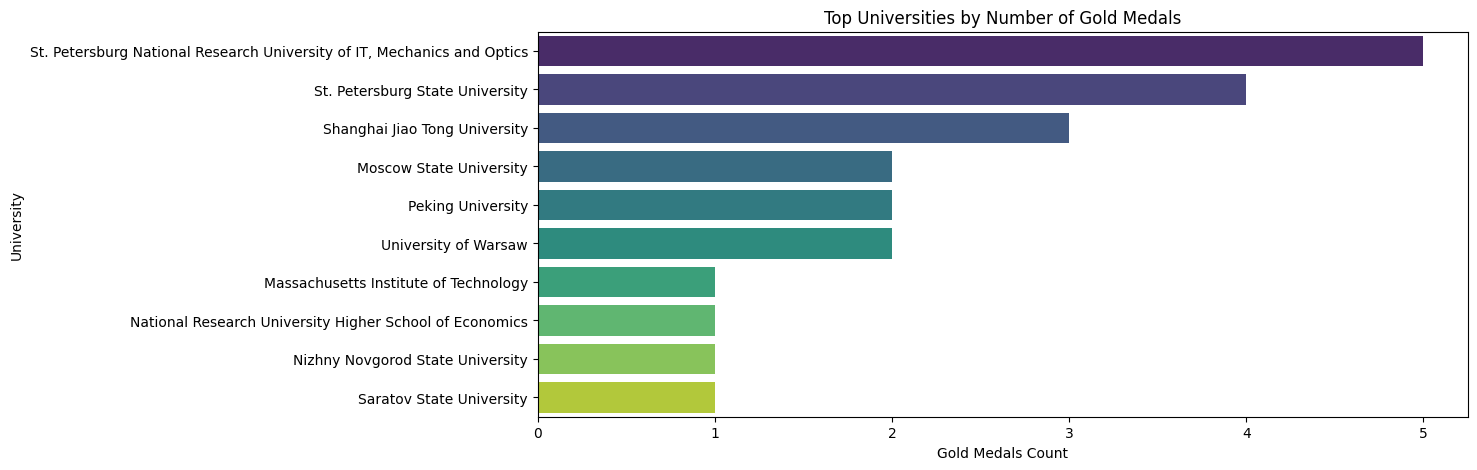

In [39]:
# Data Visulization

# Filter for world champions (Rank 1) and group by University to count the number of golds
world_champs = df[df.Rank == 1]  # Rank == 1 for gold medalists
univ_gold_count = world_champs.groupby('University').size().sort_values(ascending=False).head(10)  # Top 10 universities

# Create the bar plot
plt.figure(figsize=(12, 5))
plt.title('Top Universities by Number of Gold Medals')
plt.ylabel('University')
plt.xlabel('Gold Medals Count')
sns.barplot(y=univ_gold_count.index, x=univ_gold_count.values, palette='viridis')
plt.show()

<Figure size 1200x600 with 0 Axes>

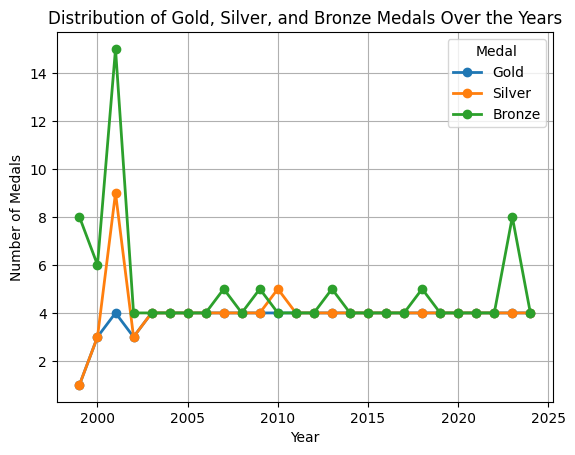

In [40]:
# Group by Year and count the number of gold, silver, and bronze medals each year
medals = df.groupby('Year')[['Gold', 'Silver', 'Bronze']].sum()
# Create the line plot
plt.figure(figsize=(12, 6))
medals.plot(kind='line', marker='o', linewidth=2)
plt.title('Distribution of Gold, Silver, and Bronze Medals Over the Years')
plt.ylabel('Number of Medals')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='Medal')
plt.show()

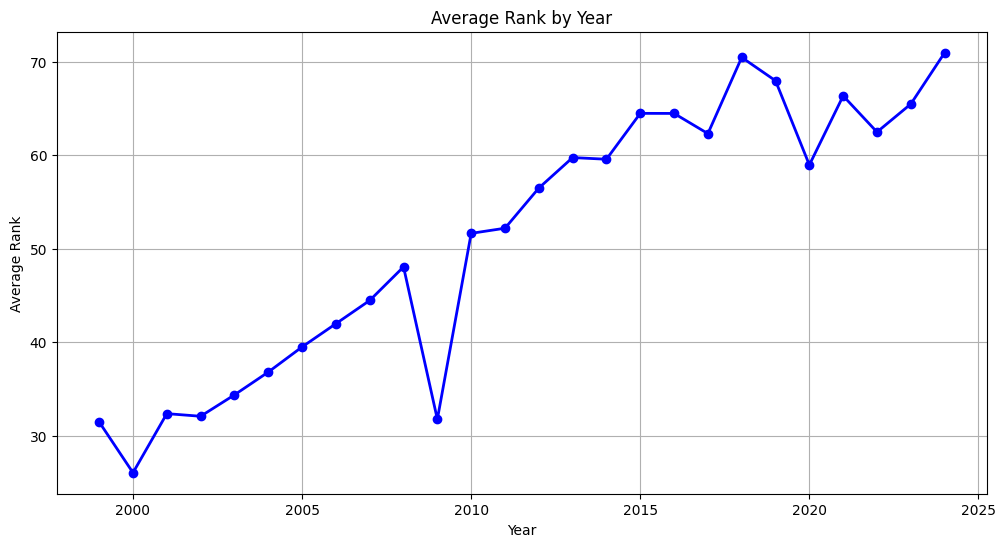

In [41]:
# Create a plot of average rank per year
avg_rank_per_year = df.groupby('Year')['Rank'].mean()

# Create the line plot
plt.figure(figsize=(12, 6))
avg_rank_per_year.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Average Rank by Year')
plt.ylabel('Average Rank')
plt.xlabel('Year')
plt.grid(True)
plt.show()


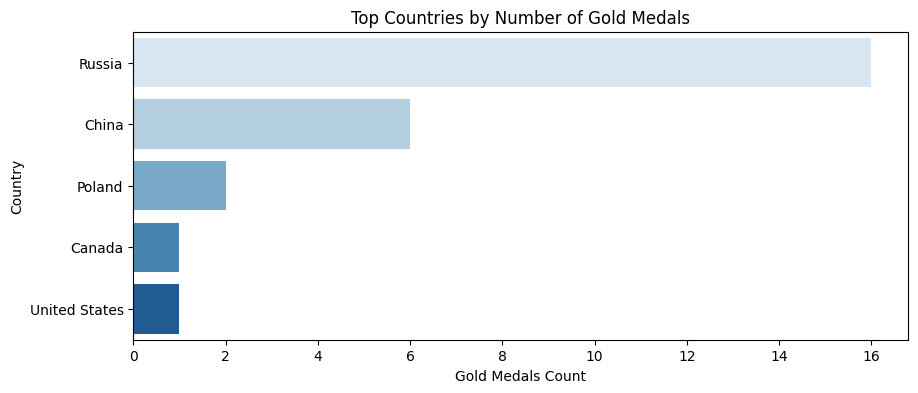

In [42]:
# Filter for world champions (Rank 1) and group by Country to count the number of golds
gold_by_country = world_champs.groupby('Country').size().sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 4))
plt.title('Top Countries by Number of Gold Medals')
plt.ylabel('Country')
plt.xlabel('Gold Medals Count')
sns.barplot(y=gold_by_country.index, x=gold_by_country.values, palette='Blues')
plt.show()


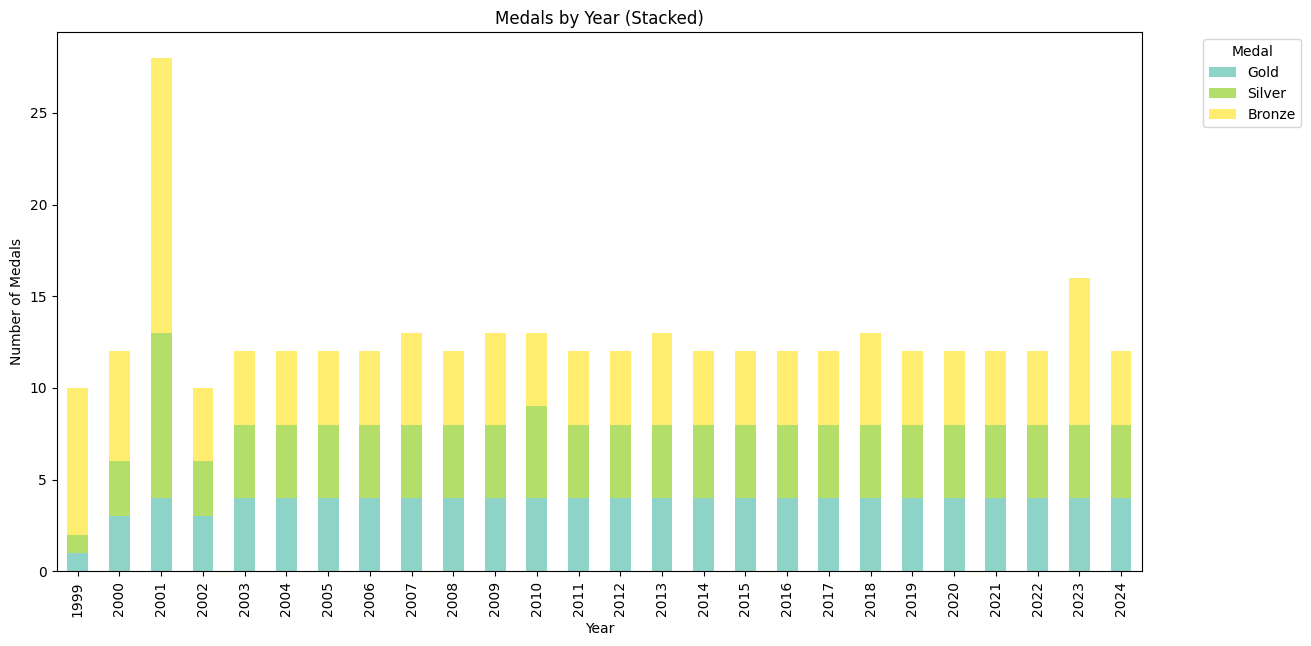

In [111]:
# Group by Year and sum medals (Gold, Silver, Bronze)
medals_yearly = df.groupby('Year')[['Gold', 'Silver', 'Bronze']].sum()

# Create the stacked bar plot
medals_yearly.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set3')
plt.title('Medals by Year (Stacked)')
plt.ylabel('Number of Medals')
plt.xlabel('Year')
plt.legend(title='Medal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


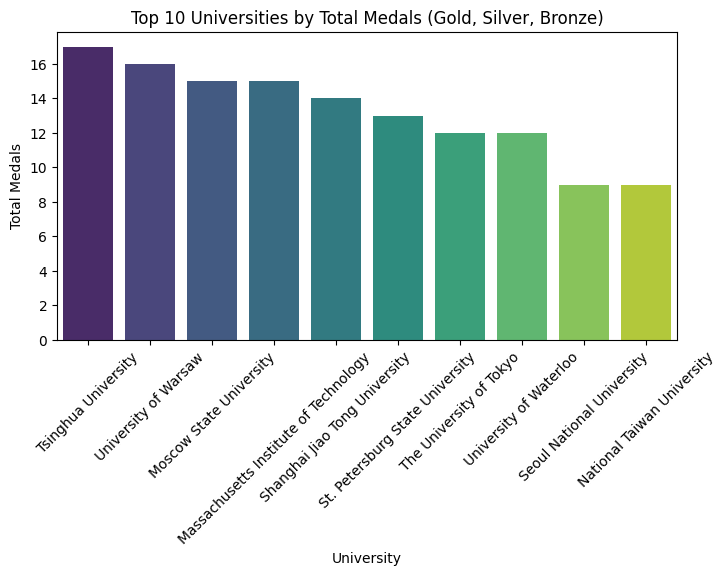

In [44]:
# Group by University and sum the medals
university_medals = df.groupby('University')[['Gold', 'Silver', 'Bronze']].sum()

# Calculate total medals per university
university_medals['Total'] = university_medals['Gold'] + university_medals['Silver'] + university_medals['Bronze']
university_medals = university_medals.sort_values(by='Total', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=university_medals.index, y=university_medals['Total'], palette='viridis')
plt.title('Top 10 Universities by Total Medals (Gold, Silver, Bronze)')
plt.xlabel('University')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Total M')

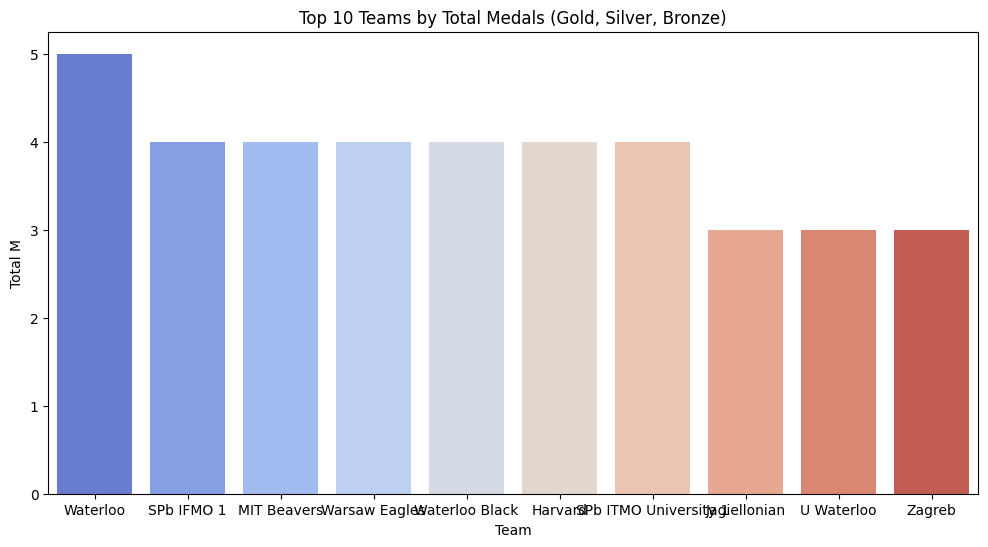

In [118]:
# Group by Team and sum the medals (Gold, Silver, Bronze)
team_medals = df.groupby('Team')[['Gold', 'Silver', 'Bronze']].sum()

# Calculate total medals per team
team_medals['Total'] = team_medals['Gold'] + team_medals['Silver'] + team_medals['Bronze']
team_medals = team_medals.sort_values(by='Total', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=team_medals.index, y=team_medals['Total'], palette='coolwarm')
plt.title('Top 10 Teams by Total Medals (Gold, Silver, Bronze)')
plt.xlabel('Team')
plt.ylabel('Total M')


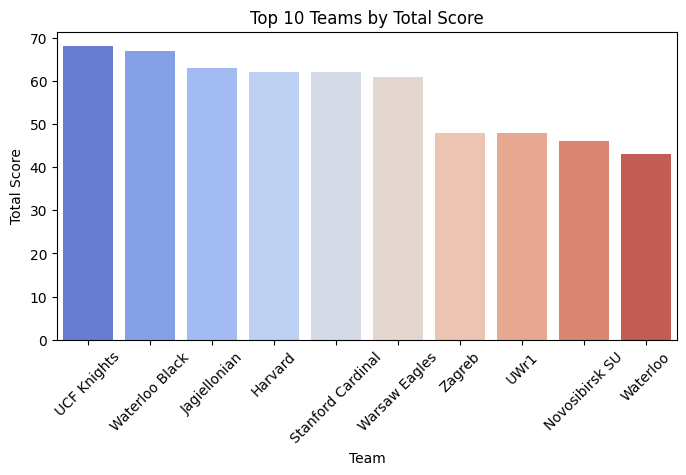

In [45]:
# Group by Team and sum the Score
team_scores = df.groupby('Team')['Score'].sum().sort_values(ascending=False).head(10)

# Create a bar chart for scores
plt.figure(figsize=(8, 4))
sns.barplot(x=team_scores.index, y=team_scores.values, palette='coolwarm')
plt.title('Top 10 Teams by Total Score')
plt.xlabel('Team')
plt.ylabel('Total Score')
plt.xticks(rotation=45)
plt.show()


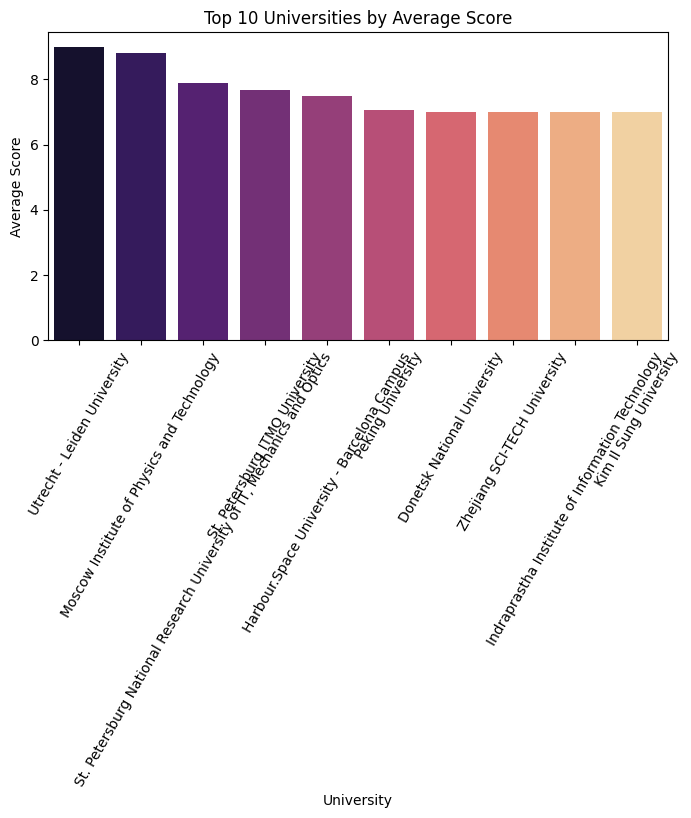

In [122]:
# Group by University and calculate the mean score
university_avg_scores = df.groupby('University')['Score'].mean().sort_values(ascending=False).head(10)

# Create a bar chart for average scores
plt.figure(figsize=(8, 4))
sns.barplot(x=university_avg_scores.index, y=university_avg_scores.values, palette='magma')
plt.title('Top 10 Universities by Average Score')
plt.xlabel('University')
plt.ylabel('Average Score')
plt.xticks(rotation=60)
plt.show()


In [49]:
# Conerting all str columns to numerical values

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate through columns and apply LabelEncoder to string columns
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column contains string (object type)
        df[col] = label_encoder.fit_transform(df[col])  # Convert strings to numeric labels

In [50]:
# Step 5
# Split Data

# Define X (Features)
X = df.drop(columns=["Score"])
# Define y (Target)
y = df["Score"]

# Check the shape of X and y
print(X.shape)  # Should show (number of rows, number of columns excluding "Score")
print(y.shape)  # Should show (number of rows,)

(2706, 19)
(2706,)


In [51]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Step 6 
# Create Model

# Initialize the Linear Regression model
lr = LinearRegression()

In [53]:
# Step 7
# Train the model

# Fit the model to the training data
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
# Step 8
# Make predictions

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [57]:
print(y_train_pred.shape)
print(y_test_pred.shape)

(2164,)
(542,)


In [58]:
# Step 9
# Evaluate the model


# Train accuracy
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

# Test accuracy
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Display results
print("Training Accuracy:")
print(f"R-squared: {train_r2:.2f}")
print(f"Mean Absolute Error: {train_mae:.2f}")
print(f"Mean Squared Error: {train_mse:.2f}")

print("\nTesting Accuracy:")
print(f"R-squared: {test_r2:.2f}")
print(f"Mean Absolute Error: {test_mae:.2f}")
print(f"Mean Squared Error: {test_mse:.2f}")

Training Accuracy:
R-squared: 0.98
Mean Absolute Error: 0.19
Mean Squared Error: 0.08

Testing Accuracy:
R-squared: 0.98
Mean Absolute Error: 0.19
Mean Squared Error: 0.09
